In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17564, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 17564 (delta 35), reused 7 (delta 7), pack-reused 17508 (from 3)
Receiving objects: 100% (17564/17564), 16.64 MiB | 25.69 MiB/s, done.
Resolving deltas: 100% (12029/12029), done.
/kaggle/working/yolov5


In [2]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.5 MB/s eta 0:00:00
  Attempting uninstall: nvid

In [3]:
import os

image_files = sorted(os.listdir(r"/kaggle/input/vehicle-dataset-for-yolo/vehicle dataset/train/images/"))
label_files = sorted(os.listdir(r"/kaggle/input/vehicle-dataset-for-yolo/vehicle dataset/train/labels/"))

for img, lbl in zip(image_files[:5], label_files[:5]):
    print(img, " ", lbl)


00043_GMC Savana Van 2012.jpg   00043_GMC Savana Van 2012.txt
00077.jpg   00077.txt
00116.jpg   00116.txt
00175_Ford E-Series Wagon Van 2012.jpg   00175_Ford E-Series Wagon Van 2012.txt
00241.jpg   00241.txt


In [4]:
print(os.listdir("/kaggle/input"))


['vehicle-dataset-for-yolo']


In [5]:
import os
import shutil

input_dataset = "/kaggle/input/vehicle-dataset-for-yolo/vehicle dataset"

working_dataset = "/kaggle/working/vehicle_dataset"

shutil.copytree(input_dataset, working_dataset, dirs_exist_ok= True)

train_images = os.path.join(working_dataset, "train/images")
train_labels = os.path.join(working_dataset, "train/labels")
val_images = os.path.join(working_dataset, "valid/images")
val_labels = os.path.join(working_dataset, "valid/labels")

print("Training images:", len(os.listdir(train_images)))
print("Training labels:", len(os.listdir(train_labels)))
print("Validation images:", len(os.listdir(val_images)))
print("Validation labels:", len(os.listdir(val_labels)))


Training images: 2100
Training labels: 2100
Validation images: 900
Validation labels: 900


In [6]:
yaml_path = "/kaggle/working/vehicle_dataset/vehicle.yaml"

vehicle_yaml = f"""
train: {working_dataset}/train/images
val: {working_dataset}/valid/images

nc: 6
names: ['car', 'truck', 'bus', 'motorbike', 'bicycle', 'van']
"""

with open(yaml_path, "w") as f:
    f.write(vehicle_yaml)

print("YAML file created at:", yaml_path)

YAML file created at: /kaggle/working/vehicle_dataset/vehicle.yaml


In [7]:
!python train.py \
    --img 640 \
    --batch 16 \
    --epochs 20 \
    --data /kaggle/working/vehicle_dataset/vehicle.yaml \
    --weights yolov5s.pt \
    --cache


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-09-07 04:32:24.410326: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757219544.754670     101 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757219544.854790     101 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [9]:
!python detect.py \
    --weights runs/train/exp/weights/best.pt \
    --img 640 \
    --conf 0.25 \
    --source /kaggle/working/vehicle_dataset/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/working/vehicle_dataset/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/900 /kaggle/working/vehicle_dataset/valid/images/00110.jpg: 480x640 1 car, 32.3ms
image 2/900 /kaggle/working/vehicle_dataset/valid/images/00262.jpg: 480x640 1 car, 9.2ms
image 3/900 /kaggle/working/vehicle_dataset/valid/images/00790.jpg: 416x640 1 car, 30.6ms
image 4/900 /kaggle/

<h1>Some Outputs</h1>

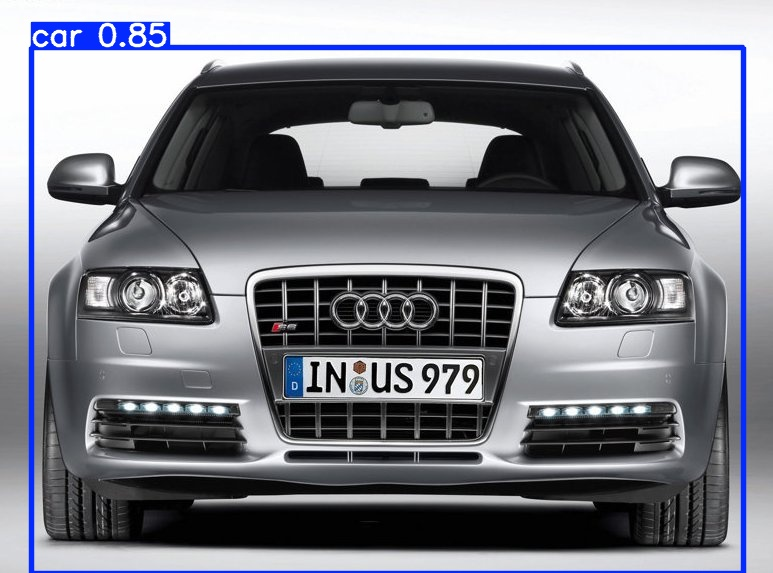

In [10]:
from IPython.display import Image, display
img_path = '/kaggle/working/yolov5/runs/detect/exp2/00110.jpg' 
display(Image(filename=img_path))


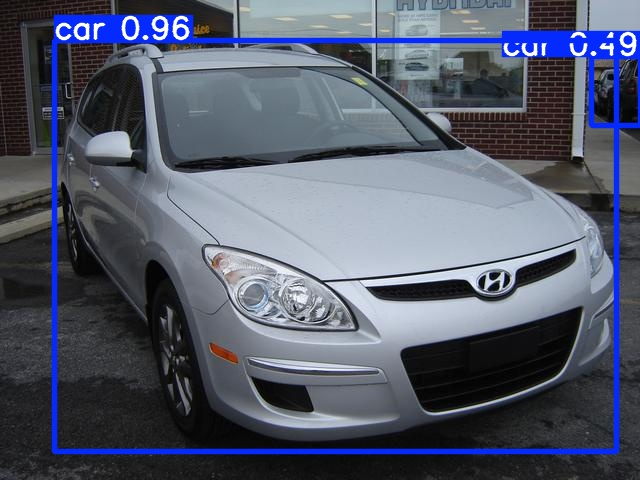

In [11]:
img_path = '/kaggle/working/yolov5/runs/detect/exp2/02321.jpg' 
display(Image(filename=img_path))

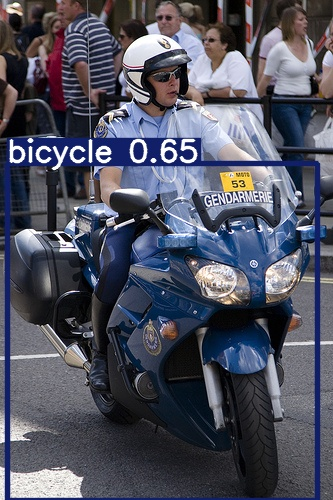

In [14]:
img_path = '/kaggle/working/yolov5/runs/detect/exp2/2011_004317.jpg' 
display(Image(filename=img_path))

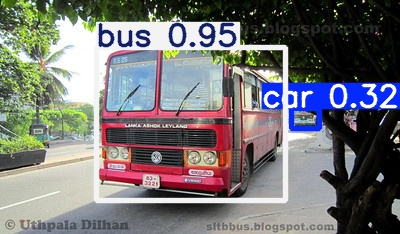

In [15]:
img_path = '/kaggle/working/yolov5/runs/detect/exp2/8060200319_8c4be82e96_w.jpg' 
display(Image(filename=img_path))